# Queue Modeling: M/M/1 & M/M/2 


In [161]:
import numpy as np
import matplotlib.pyplot as plt
def expo(mu ):
    return ( -np.log (np.random.rand()) /mu)


# 1. Function that simulates an M/M/1 queue:

In [260]:
def File_d_attente (lamda, mue, t):
    z=[]
    z.append(0)
    u=np.random.uniform()   
    s=0      
    S=[]
    S.append(s)
    i=0
    while s<=t:
        if z[i]==0:
            v=np.random.uniform()
            s=s-np.log(v)/lamda   # suit la loi exponentielle de paramètre lamda
            S.append(s)
            z.append(1)
        else :
            v=np.random.uniform()
            s=s-np.log(v)/(lamda+mue)
            S.append(s)
            if np.random.uniform()< lamda/(lamda+mue) :
                n=z[i]
                z.append(n+1)
            else :
                n=z[i]
                z.append(n-1)
        i=i+1
    d = np.size(z)
    z = z[:d-1]
    S = S[:d-1]
    return S,z

# 1.a Graphic representation of the Total number of customers present on each of its two queues:

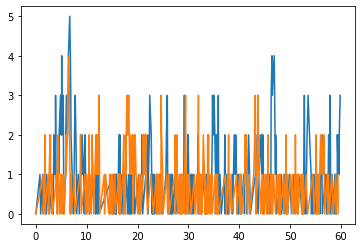

In [410]:
lamda = 3
beta = 8
moyen = []
N = 100
s1, N1 = File_d_attente (lamda, beta,60) # simulation de la première file
s2, N2 = File_d_attente (lamda, beta,60) # simulation de la deuxième file
n = max(np.size(N1),np.size(N2))
NT = np.zeros(n)    # le nombre totale de clients en attente dans la file
for i in range(n):
    if i < np.size(N1) and i < np.size(N2):
        NT[i] = N2[i]+N1[i]
    else :
        if i < np.size(N1):
            NT[i] = N1[i]
        else :
            NT[i] = N2[i]
plt.plot(s1,N1) 
plt.plot(s2,N2)

# 1.b estimate of the total number of customers waiting in steady state

In [475]:
lamda = 3
beta = 9
moyen = []
N = 1000
#Je simule les deux files N fois, a chaque itération je garde la derniere valeurs dans le vecteur NT
#alors La moyen de Ce vecteur converge vers la moyenne theorique 2*lamda/(beta - lamda)

for k in range(1000):
    s1, N1 = File_d_attente (lamda, beta,20)
    s2, N2 = File_d_attente (lamda, beta,20)
    n = max(np.size(N1),np.size(N2))
    NT = np.zeros(n)
    for i in range(n):
        if i < np.size(N1) and i < np.size(N2):
            NT[i] = N2[i]+N1[i]
        #s.append(s1[i])
        else :
            if i < np.size(N1):
                NT[i] = N1[i]
            else :
                NT[i] = N2[i]           
    moyen.append(NT[n-2])
moy = sum(moyen)/1000
moyen_theori = 2*lamda/(beta - lamda)
print('L estimation du nombre total de clients en attente en régime stationnaire est :', moy)
print('La valeur théorique du nombre total de clients en attente en régime stationnaire',moyen_theori )

L estimation du nombre total de clients en attente en régime stationnaire est : 1.061
La valeur théorique du nombre total de clients en attente en régime stationnaire 1.0


# 1.c estimate the average time spent by a customer in one of these queues

In [352]:
def File_d_attente_updated(lamda, mue, t):
    N=[]
    N.append(0)
    u=np.random.uniform()   
    #s=0      
    S=[]
    #S.append(s)
    TA = [] # temps d'arrivé
    TS = [] # temps de sortie
    TA.append(0)
    TS.append(0)
    i=0
    s = 0
    while s<=t:
        if N[i]==0:
            v=np.random.uniform()
            s=s-np.log(v)/lamda   # suit la loi exponentielle de paramètre lamda
            TA.append(s)
            N.append(1)
        else :
            v=np.random.uniform()
            s=s-np.log(v)/(lamda+mue)
            S.append(s)
            #S.append(s)
            if np.random.uniform()< lamda/(lamda+mue) :
                N.append(N[i]+1)
                TA.append(s)
            else :
                N.append(N[i]-1)
                TS.append(s)
        i=i+1
    return TA,TS,N

In [473]:
lamda = 4
beta = 10
T_d_attente_moy = []
TA, TS, N = File_d_attente_updated(lamda, beta, 5)
T_d_attente = []
for i in range(np.size(TS)):
    T_d_attente.append(TS[i] - TA[i])
print('les temps passés par les 5 premiers client arrivée dans la file est :',T_d_attente[:5] )

les temps passés par les 5 premiers client arrivée dans la file est : [0, 0.054095412278511196, 0.08995318957097083, 0.23032231124914676, 0.18360118843114742]


# 1.d Calculate a Monte Carlo estimate of the average time spent by a customer in a steady-state M/M/1 queue:

In [472]:
#Le temps passer par un client dans une file d'attente T = TA - TS
N1 = 100
lamda = 4
beta = 10
T_d_attente_moy = []
for i in range(N1):
    TA, TS, N = File_d_attente_updated(lamda, beta, 5)
    T_d_attente = []
    for i in range(np.size(TS)):
        T_d_attente.append(TS[i] - TA[i])
    T_d_attente_moy.append(T_d_attente[np.size(TS)-1])
Sum1 = sum(T_d_attente_moy)
T_mo = Sum1/100
Tmoy_theori = 1/(-lamda+beta)
print('estimation Monte Carlo du temps moyen passé par un client dans une file est :', T_mo)
print('la valeur theorique du temps moyen passé par un client dans une file est :',Tmoy_theori)

estimation Monte Carlo du temps moyen passé par un client dans une file est : 0.16437490758331944
la valeur theorique du temps moyen passé par un client dans une file est : 0.16666666666666666


# 2.a System transitions: M/M/2 Queue

if we are in the stat (0,0) there is only one possibility --> (0,1) with proba = 1 

From state (0,1): we have two possibilities
1. (0,1)--> (1,1) with proba = 2*lambda / (beta+2*lambda)
2. (0,1)--> (0,0) with proba = beta / (beta+2*lambda)

From state (0,1): we have two possibilities
1. (1,0)--> (1,1) with probas = 2*lambda / (beta+2*lambda)
2. (1,0)--> (0,0) with probas = beta / (beta+2*lambda)

From state (1,1): we have three possibilities
1. (1,1) --> (2,1) with proba = 2*lambda / (2*beta+2*lambda)
2. (1,1) --> (1,0) with proba = beta / (2*beta+2*lambda)
3. (1,1) --> (0,1) with proba = beta / (2*beta+2*lambda)

From state (n,1) we have two possibilities (with n> 1) :
1. (n,1) --> (n+1,1) with probas = 2*lambda / (2*beta+2*lambda)
2. (n,1) --> (n-1,1) with probas = 2*beta / (2*beta+2*lambda)

# 2.b Program that simulates the evolution of the queue, with the graph of the number of customers in the queue over time

In [493]:
def File_d_attente_MM2(lamda, mue, t):
    N = [] # le nombre total des client
    #on utilise 2 variable G1 et G2 qui decrit l'état du systeme (G1,G2) at avec a chaque état on a G1-1 clients en attente
    #et G2 in {0,1}
    #exemple (G1,G2) = (n,1): les deux guichet sont occupé et on a n-1 clients en attente
    G1 = []
    G2 = []
    G1.append(0)
    G2.append(0)
    u=np.random.uniform()   
    s=0
    i = 0
    S=[]
    S.append(s)
    while s<=t:
        if G1[i] == 0 and G2[i] == 0: # pour le cas (0,0) on a forcément l'arrivée d'un client au premier guichet 
            v=np.random.uniform()
            s=s-np.log(v)/(2*lamda)
            S.append(s)
            G1.append(1)
            G2.append(0)
        elif G1[i] == 1 and G2[i] == 0: # pour le cas (1,0) on a soit  l'arrivée d'un client au 2eme guichet {(1,0)-->(1,1)} 
            v=np.random.uniform()       # le depart du client du guichet 1 {(1,0)-->(0,0)}
            s=s-np.log(v)/(2*lamda+mue)
            S.append(s)
            u = np.random.uniform()
            if u < 2*lamda/(2*lamda+mue):
                G1.append(1)
                G2.append(1)
            else :
                G1.append(0)
                G2.append(0)
        elif G1[i] == 0 and G2[i] == 1: # pour le cas (1,0) on a soit  l'arrivée d'un client au 2eme guichet {(0,1)-->(1,1)}
            v=np.random.uniform()        # le depart du client du guichet 1 {(0,1)-->(0,0)}
            s=s-np.log(v)/(2*lamda+mue)
            S.append(s)
            u = np.random.uniform()
            if u < 2*lamda/(2*lamda+mue):
                G1.append(1)
                G2.append(1)
            else :
                G1.append(0)
                G2.append(0)
                
        elif  G1[i] == 1 and G2[i] == 1:  # pour le cas (1,1) on a 3 possibilité: [(2,1),(1,0),(0,1)]
            v=np.random.uniform()
            s=s-np.log(v)/(2*lamda+2*mue)
            S.append(s)
            u = np.random.uniform()
            if u < 2*lamda/(2*lamda+2*mue): # (1,1)-->(2,1) avec probas = 2*lamda/(2*lamda+2*mue)
                G1.append(2)
                G2.append(1)
            #Ici comme (1,1)-->(0,1) & (1,1)-->(1,0) ont la meme proba je suppose que la priorité est pour (1,1)-->(0,1)  
            elif u >= 2*lamda/(2*lamda+2*mue) and u < (2*lamda+mue)/(2*lamda+2*mue): # (1,1)-->(0,1) avec probas = (mue)/(2*lamda+2*mue)
                G1.append(0)
                G2.append(1) #(0,1)
            else :  # (1,1)-->(0,1) avec probas = (mue)/(2*lamda+2*mue)
                G1.append(1)
                G2.append(0) #(1,0)
        elif G1[i] > 1 and G2[i] == 1:
            v=np.random.uniform()
            s=s-np.log(v)/(2*lamda+2*mue)
            S.append(s)
            u = np.random.uniform()
            if u < 2*lamda/(2*lamda+2*mue):
                G1.append(G1[i]+1)
                G2.append(1)
            else :
                G1.append(G1[i]-1)
                G2.append(1)
        N.append(G1[i]+ G2[i]) # le nombre total des client donnée par le nombre des client en attente + les client entrain d'etre servie 
        i=i+1
    d = np.size(N)
    N = N[:d-1]
    S = S[:d-1]
    return N, S

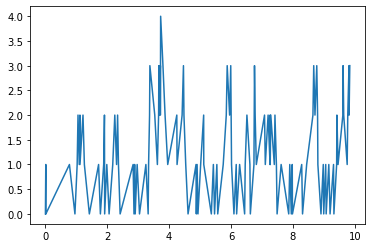

In [494]:
lamda = 3
mue = 8
t = 10
N_MM2,sau = File_d_attente_MM2(lamda, mue, t)
plt.plot(sau,N_MM2)

# 2.c Monte Carlo estimation of the number of customers waiting in steady state

In [492]:
lamda = 3
mue = 9
t = 20
M = 1000
N_moy = []
for i in range(M):
    N_MM2,sau = File_d_attente_MM2(lamda, mue, t)
    n= np.size(N_MM2)
    N_moy.append(N_MM2[n-1])
moyen_Monte_Carlo = sum(N_moy)/M
print(moyen_Monte_Carlo)

0.994


By comparing the Monte Carlo estimate of the number of customers waiting in steady state in this case with the previous case (see question 1.b) we notice that the latter is greater than the first, which means that the average of the numbers total of customers in the MM2 case is smaller than in the case of 2 M/M/1, the operation is therefore much improved in the case of merging the two queues into one with 2 servers (counters)